In [1]:
%pylab inline
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import gc
from sklearn.tree import DecisionTreeClassifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
fileURL = "Crimes_-_2001_to_present.csv"
chicago_data = pd.read_csv(fileURL, names=[ 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'], header=None,low_memory=False)

In [3]:
chicago_data.shape

(7008909, 22)

In [4]:
chicago_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,false,false,...,8,45,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
2,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,false,false,...,21,73,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,false,false,...,18,70,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,false,false,...,20,42,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [5]:

import matplotlib.pyplot as plt
import seaborn as sns


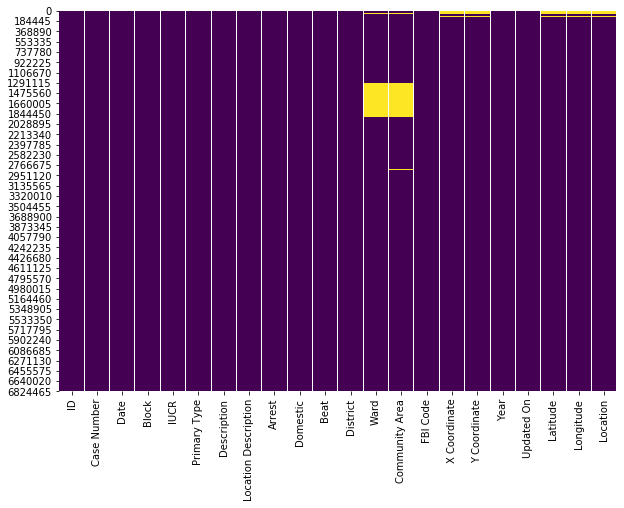

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(chicago_data.isnull(), cbar = False, cmap = 'viridis')

In [7]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008909 entries, 0 to 7008908
Data columns (total 22 columns):
ID                      object
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  object
Domestic                object
Beat                    object
District                object
Ward                    object
Community Area          object
FBI Code                object
X Coordinate            object
Y Coordinate            object
Year                    object
Updated On              object
Latitude                object
Longitude               object
Location                object
dtypes: object(22)
memory usage: 1.1+ GB


In [8]:
print("chicago_data dataset: missing values check")
chicago_data= chicago_data.replace('?', np.NaN)
chicago_data.isnull().sum()

chicago_data dataset: missing values check


ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      5835
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614826
Community Area          613495
FBI Code                     0
X Coordinate             66897
Y Coordinate             66897
Year                         0
Updated On                   0
Latitude                 66897
Longitude                66897
Location                 66897
dtype: int64

In [9]:
#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(chicago_data))
#print(z)
#chicago_data = chicago_data[(z < 3).all(axis=1)]

In [10]:
#chicago_data.drop_duplicates(subset=None, keep=’first’, inplace=False)

In [9]:
chicago_data = chicago_data.iloc[1:]
chicago_data=chicago_data.dropna()

In [10]:
chicago_data['Year'] = chicago_data['Year'].astype(int)

In [11]:
cd = chicago_data[chicago_data['Year'] >= 2005]

In [12]:
cd.describe()


,Year
count,5.043385e+06
mean,2.011049e+03
std,4.253852e+00
min,2.005000e+03
25%,2.007000e+03
50%,2.011000e+03
75%,2.015000e+03
max,2.019000e+03


In [13]:
cd.shape

(5043385, 22)

In [14]:
print("chicago_data dataset: missing values check")
cd= cd.replace('?', np.NaN)
cd.isnull().sum()

chicago_data dataset: missing values check


ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [15]:
pd.value_counts(cd['Arrest'])

false    3695238
true     1348147
Name: Arrest, dtype: int64

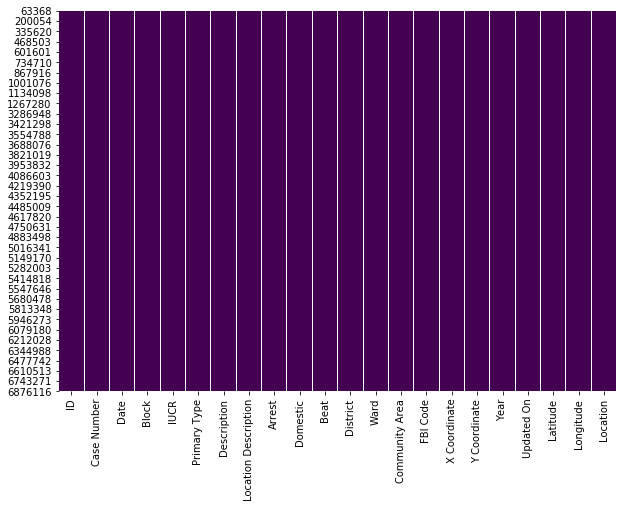

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(cd.isnull(), cbar = False, cmap = 'viridis')

In [17]:
    cd.drop_duplicates(subset='Case Number', keep='first', inplace=False)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
63368,11665567,JC234307,04/10/2019 04:37:00 PM,102XX S VERNON AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,"SCHOOL, PUBLIC, BUILDING",false,false,...,9,49,17,1181051,1837225,2019,08/03/2019 04:02:13 PM,41.708589,-87.612583094,"(41.708589, -87.612583094)"
63452,11667968,JC237058,04/19/2019 01:57:00 PM,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,false,true,...,28,25,17,1141669,1901165,2019,07/24/2019 04:15:49 PM,41.884865037,-87.755230327,"(41.884865037, -87.755230327)"
63453,11667963,JC235212,04/12/2019 04:08:00 PM,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,false,true,...,30,16,02,1147835,1921408,2019,10/02/2019 04:13:24 PM,41.940297617,-87.732066473,"(41.940297617, -87.732066473)"
63529,11668309,JC238187,04/25/2019 05:20:00 PM,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,false,true,...,9,49,08B,1180832,1833222,2019,06/30/2019 03:56:27 PM,41.697609261,-87.613507612,"(41.697609261, -87.613507612)"
63936,11692179,JC261724,05/13/2019 05:26:00 PM,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,false,false,...,21,73,08A,1169908,1844927,2019,06/30/2019 03:56:27 PM,41.729973132,-87.653166753,"(41.729973132, -87.653166753)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008900,9999998,HY188874,03/18/2015 04:00:00 AM,036XX W BELMONT AVE,0460,BATTERY,SIMPLE,RESIDENCE,false,false,...,35,21,08B,1151659,1921038,2015,02/10/2018 03:50:01 PM,41.939207846,-87.718021657,"(41.939207846, -87.718021657)"
7008901,9999999,HY189683,03/18/2015 05:08:00 PM,043XX N CENTRAL AVE,0560,ASSAULT,SIMPLE,RESTAURANT,true,false,...,38,15,08A,1138222,1928502,2015,02/10/2018 03:50:01 PM,41.959943835,-87.767225719,"(41.959943835, -87.767225719)"
7008902,11700037,JC278815,05/26/2019 12:10:00 AM,046XX W MC LEAN AVE,0460,BATTERY,SIMPLE,RESIDENCE,true,false,...,36,19,08B,1145043,1913219,2019,06/30/2019 03:56:27 PM,41.917879493,-87.742535496,"(41.917879493, -87.742535496)"
7008904,11700926,JC279725,05/26/2019 05:13:00 PM,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,false,true,...,24,29,26,1152126,1893208,2019,06/30/2019 03:56:27 PM,41.862830429,-87.717040084,"(41.862830429, -87.717040084)"


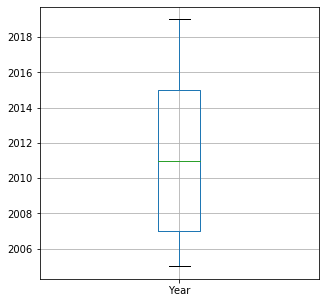

In [18]:
boxplots = cd.boxplot(figsize=(5,5))

In [19]:
pd.value_counts(cd['Year'])[:10]

2005    449868
2006    445496
2007    435530
2008    419783
2009    385839
2010    369789
2011    350891
2012    335079
2013    306300
2014    273575
Name: Year, dtype: int64

In [ ]:
cd['year1'] = pd.DatetimeIndex(cd['Date']).year

In [ ]:
pd.value_counts(cd['year1'])[:10]

In [20]:
#Convert Date column to Date Time format
cd['Date']= pd.to_datetime(cd['Date'], format='%m/%d/%Y %H:%M:%S %p' , errors='coerce')

In [21]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043385 entries, 63368 to 7008906
Data columns (total 22 columns):
ID                      object
Case Number             object
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  object
Domestic                object
Beat                    object
District                object
Ward                    object
Community Area          object
FBI Code                object
X Coordinate            object
Y Coordinate            object
Year                    int64
Updated On              object
Latitude                object
Longitude               object
Location                object
dtypes: datetime64[ns](1), int64(1), object(20)
memory usage: 885.0+ MB


In [22]:
cd=cd.drop('X Coordinate',axis=1)
cd=cd.drop('Y Coordinate',axis=1)
cd=cd.drop('Updated On',axis=1)
cd=cd.drop('ID',axis=1)


In [23]:
cd=cd.drop('FBI Code',axis=1)
cd.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Location
63368,JC234307,2019-04-10 04:37:00,102XX S VERNON AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,"SCHOOL, PUBLIC, BUILDING",false,false,0511,005,9,49,2019,41.708589,-87.612583094,"(41.708589, -87.612583094)"
63452,JC237058,2019-04-19 01:57:00,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,false,true,1532,015,28,25,2019,41.884865037,-87.755230327,"(41.884865037, -87.755230327)"
63453,JC235212,2019-04-12 04:08:00,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,false,true,1731,017,30,16,2019,41.940297617,-87.732066473,"(41.940297617, -87.732066473)"
63529,JC238187,2019-04-25 05:20:00,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,false,true,0513,005,9,49,2019,41.697609261,-87.613507612,"(41.697609261, -87.613507612)"
63936,JC261724,2019-05-13 05:26:00,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,false,false,2222,022,21,73,2019,41.729973132,-87.653166753,"(41.729973132, -87.653166753)"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify

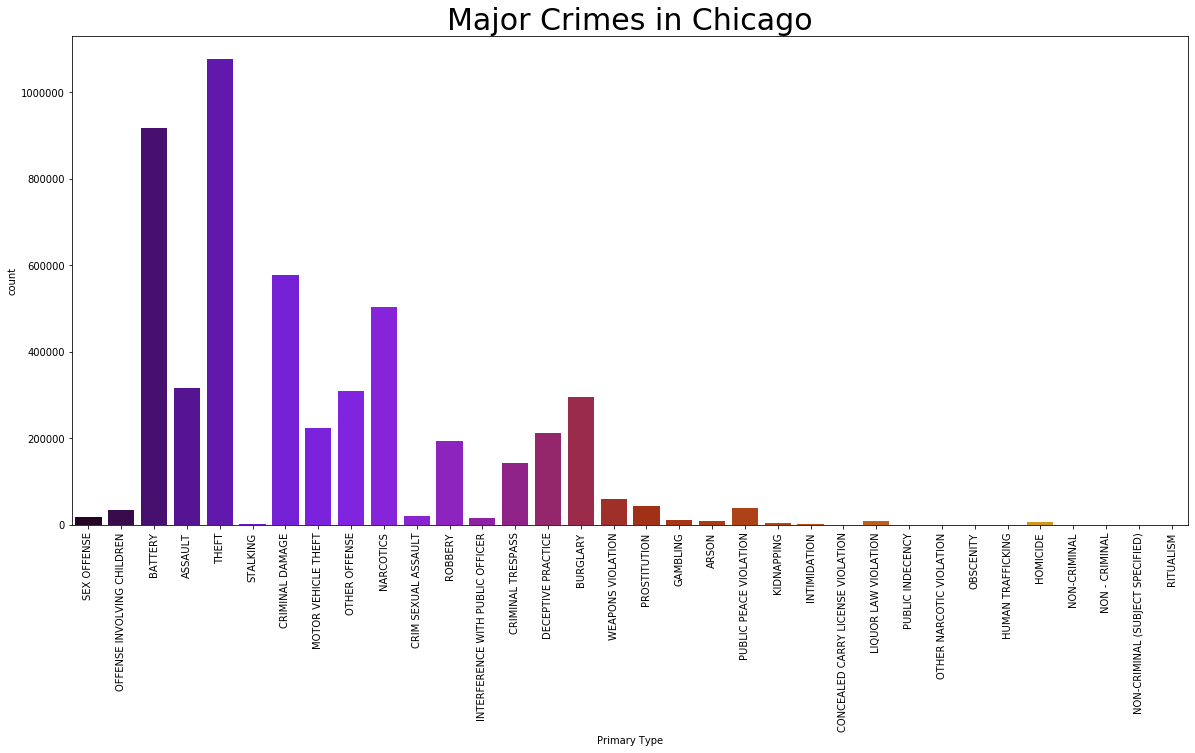

In [24]:
# Crimes according to primary crime type
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(cd['Primary Type'], palette = 'gnuplot')
plt.title('Major Crimes in Chicago', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

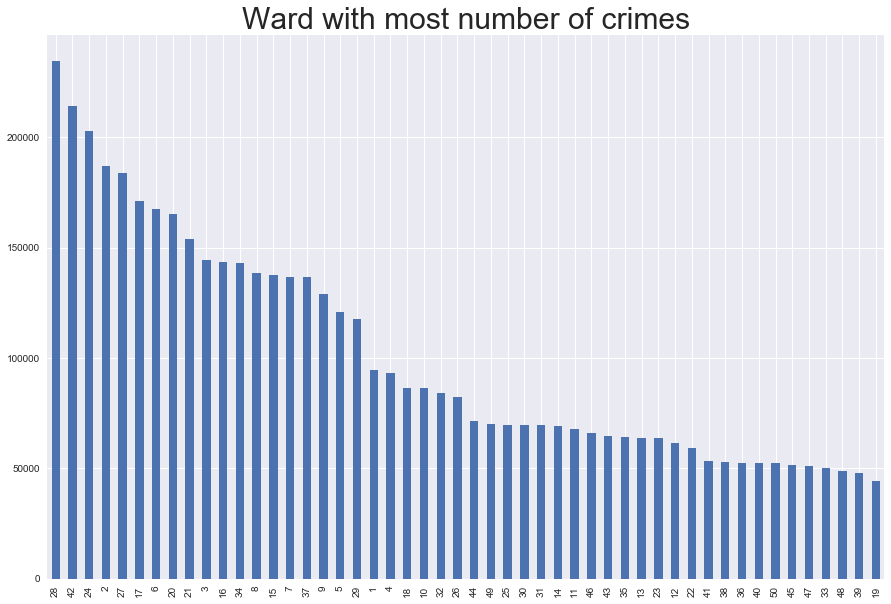

In [25]:
# Wards with count of respective crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

cd['Ward'].value_counts().plot.bar(figsize = (15, 10))

plt.title('Ward with most number of crimes',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

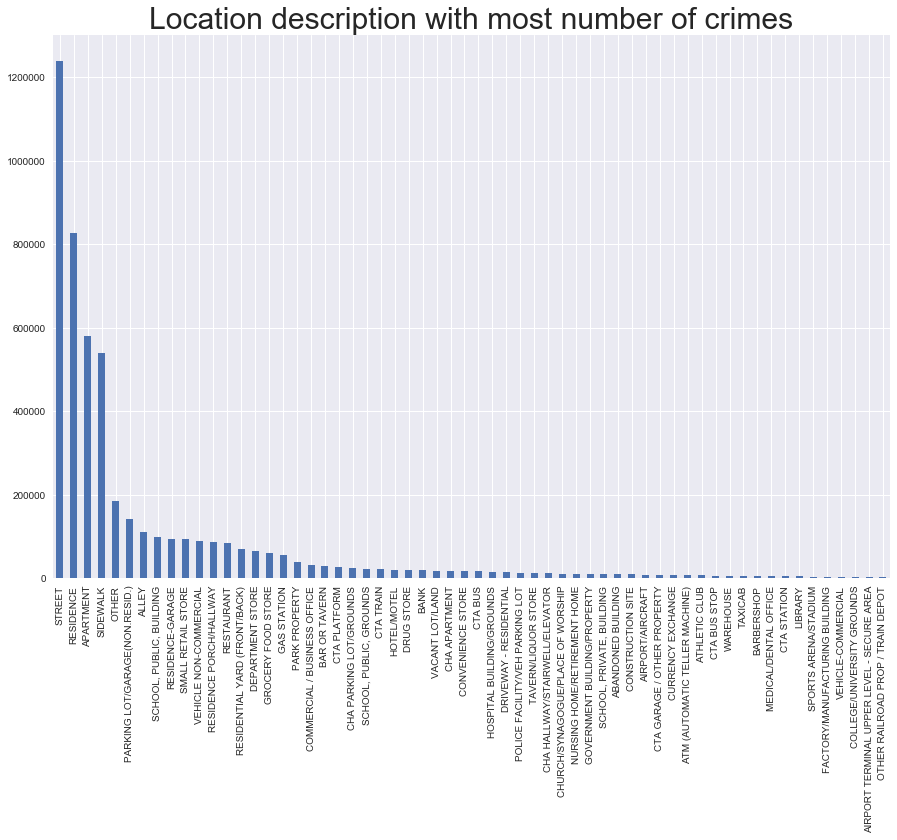

In [26]:
# Wards with count of respective crimes

plt.rcParams['figure.figsize'] = (20, 9)

cd['Location Description'].value_counts().head(60).plot.bar(figsize = (15, 10))

plt.title('Location description with most number of crimes',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()